<a href="https://colab.research.google.com/github/suahplanet/mining2022/blob/main/data_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chipotle 주문 데이터 이용 연습문제


### **연습1: Chipotle 주문 데이터 이용**
(1)  가장 잘 팔리지 않은 (주문량이 가장 적은) 메뉴 10개를 보여 주세요. 

(2)  가격이 가장 저렴한 메뉴 5개를 보여주세요. 


In [99]:
fpath = 'https://raw.githubusercontent.com/ykjoy/mining/main/chipotle.csv'
chipo = pd.read_csv(fpath)

print(type(chipo))

<class 'pandas.core.frame.DataFrame'>


In [100]:
# (1) 주문량이 가장 적은 메뉴 10개
order_quantity = chipo.groupby('item_name')['quantity'].sum()
order_sorted = order_quantity.sort_values()[:10]
print(order_sorted)

item_name
Carnitas Salad                       1
Veggie Crispy Tacos                  1
Chips and Mild Fresh Tomato Salsa    1
Crispy Tacos                         2
Salad                                2
Bowl                                 4
Steak Salad                          4
Veggie Salad                         6
Carnitas Salad Bowl                  6
Burrito                              6
Name: quantity, dtype: int64


In [101]:
# (2) 가격이 가장 저렴한 메뉴 5개
chipo_one_item = chipo[chipo.quantity == 1]
price_per_item = chipo_one_item.groupby('item_name')['item_price'].min() 

print(price_per_item.sort_values()[:5])

item_name
Canned Soda          $1.09 
Bottled Water        $1.09 
Canned Soft Drink    $1.25 
Side of Chips        $1.69 
Chips                $1.99 
Name: item_price, dtype: object


# 공공데이터 이용 연습문제
사용한 공공데이터 : 서울시 자동차 등록현황(연료별) 통계 중 전기, 하이브리드, 수소 (2015.01 ~ 2021.12) (https://data.seoul.go.kr/dataList/10860/S/2/datasetView.do)

In [4]:
%matplotlib inline
import pandas as pd
import seaborn as sns 

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [71]:
import pandas as pd

df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/자동차+등록현황(연료별)3.csv")

display(df) # 처음 5행 확인
print(df.info()) 
print(df.describe()) 

,시점,차종별(1),계,계.1,계.2
0,시점,차종별(1),전기,하이브리드,수소
1,2015. 01,계,832,28203,-
2,2015. 02,계,866,28621,-
3,2015. 03,계,878,29168,-
4,2015. 04,계,906,29205,-
...,...,...,...,...,...
80,2021. 08,계,31220,133203,2109
81,2021. 09,계,33434,135667,2197
82,2021. 10,계,35067,137938,2285
83,2021. 11,계,38840,140097,2383


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   시점      85 non-null     object
 1   차종별(1)  85 non-null     object
 2   계       85 non-null     object
 3   계.1     85 non-null     object
 4   계.2     85 non-null     object
dtypes: object(5)
memory usage: 3.4+ KB
None
        시점 차종별(1)   계    계.1 계.2
count   85     85  85     85  85
unique  85      2  85     85  46
top     시점      계  전기  하이브리드  13
freq     1     84   1      1  13


In [72]:
df= df.drop(index=0, axis=0)

display(df)


,시점,차종별(1),계,계.1,계.2
1,2015. 01,계,832,28203,-
2,2015. 02,계,866,28621,-
3,2015. 03,계,878,29168,-
4,2015. 04,계,906,29205,-
5,2015. 05,계,903,29887,-
...,...,...,...,...,...
80,2021. 08,계,31220,133203,2109
81,2021. 09,계,33434,135667,2197
82,2021. 10,계,35067,137938,2285
83,2021. 11,계,38840,140097,2383


In [75]:
df.drop(columns='차종별(1)', inplace=True)

display(df)

,시점,계,계.1,계.2
1,2015. 01,832,28203,-
2,2015. 02,866,28621,-
3,2015. 03,878,29168,-
4,2015. 04,906,29205,-
5,2015. 05,903,29887,-
...,...,...,...,...
80,2021. 08,31220,133203,2109
81,2021. 09,33434,135667,2197
82,2021. 10,35067,137938,2285
83,2021. 11,38840,140097,2383


In [76]:
df.columns = ['time', 'ev', 'hev', 'fcev']

display(df)
print(df.info())

,time,ev,hev,fcev
1,2015. 01,832,28203,-
2,2015. 02,866,28621,-
3,2015. 03,878,29168,-
4,2015. 04,906,29205,-
5,2015. 05,903,29887,-
...,...,...,...,...
80,2021. 08,31220,133203,2109
81,2021. 09,33434,135667,2197
82,2021. 10,35067,137938,2285
83,2021. 11,38840,140097,2383


<class 'pandas.core.frame.DataFrame'>
Int64Index: 84 entries, 1 to 84
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   time    84 non-null     object
 1   ev      84 non-null     object
 2   hev     84 non-null     object
 3   fcev    84 non-null     object
dtypes: object(4)
memory usage: 3.3+ KB
None


In [77]:
df['year'] = df.time.str.split('.').str[0]

display(df)
print(df.info())

,time,ev,hev,fcev,year
1,2015. 01,832,28203,-,2015
2,2015. 02,866,28621,-,2015
3,2015. 03,878,29168,-,2015
4,2015. 04,906,29205,-,2015
5,2015. 05,903,29887,-,2015
...,...,...,...,...,...
80,2021. 08,31220,133203,2109,2021
81,2021. 09,33434,135667,2197,2021
82,2021. 10,35067,137938,2285,2021
83,2021. 11,38840,140097,2383,2021


<class 'pandas.core.frame.DataFrame'>
Int64Index: 84 entries, 1 to 84
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   time    84 non-null     object
 1   ev      84 non-null     object
 2   hev     84 non-null     object
 3   fcev    84 non-null     object
 4   year    84 non-null     object
dtypes: object(5)
memory usage: 3.9+ KB
None


In [80]:
df = df.replace('-', 0)

display(df)
df.info()


,time,ev,hev,fcev,year
1,2015. 01,832,28203,0,2015
2,2015. 02,866,28621,0,2015
3,2015. 03,878,29168,0,2015
4,2015. 04,906,29205,0,2015
5,2015. 05,903,29887,0,2015
...,...,...,...,...,...
80,2021. 08,31220,133203,2109,2021
81,2021. 09,33434,135667,2197,2021
82,2021. 10,35067,137938,2285,2021
83,2021. 11,38840,140097,2383,2021


<class 'pandas.core.frame.DataFrame'>
Int64Index: 84 entries, 1 to 84
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   time    84 non-null     object
 1   ev      84 non-null     object
 2   hev     84 non-null     object
 3   fcev    84 non-null     object
 4   year    84 non-null     object
dtypes: object(5)
memory usage: 3.9+ KB


In [92]:
df = df.astype({'ev':'int','hev':'int','fcev':'float','year':'int'})

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84 entries, 1 to 84
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   time    84 non-null     object 
 1   ev      84 non-null     int64  
 2   hev     84 non-null     int64  
 3   fcev    84 non-null     float64
 4   year    84 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 3.9+ KB


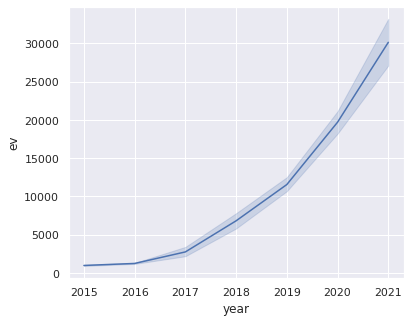

In [94]:
sns.set(rc={'figure.figsize':(6, 5)}) 

# x축에 연도 표시
sns.lineplot(data = df, x = 'year', y = 'ev', ci=None)